In [1]:
# This script compares performance against the market index. 
# Updated by: Kuo L. 2022-05-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Using pands-datareader module to connect to  yahoo finance api 
# to get close price for each ticker stock/ETF.
# for Market Index: NASDAQ Composite (^IXIC), 
#                   S&P 500 (^GSPC), 
#                   Dow Jones Industrial Average (^DJI)
#                   Russell 2000 (^RUT)

market_inx = '^GSPC' # GSPC for S&P 500

assets = [market_inx, 'AAPL','AMZN','GOOGL']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2020-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,AAPL,AMZN,GOOGL
Date,,,
2020-01-02,73.894318,1898.010010,1368.680054
2020-01-03,73.175926,1874.969971,1361.520020
2020-01-06,73.759003,1902.880005,1397.810059
2020-01-07,73.412125,1906.859985,1395.109985
2020-01-08,74.593040,1891.969971,1405.040039


In [4]:
pf_data.tail() #check companies still open and public at ending date

,AAPL,AMZN,GOOGL
Date,,,
2022-04-29,157.649994,2485.629883,2282.189941
2022-05-02,157.960007,2490.000000,2331.659912
2022-05-03,159.479996,2485.070068,2346.679932
2022-05-04,166.020004,2518.570068,2445.219971
2022-05-05,155.910004,2325.000000,2322.969971


<AxesSubplot:xlabel='Date'>

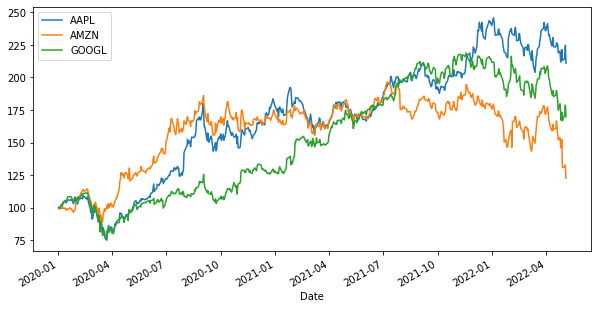

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

AAPL     0.316374
AMZN     0.085981
GOOGL    0.224152
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,AAPL,AMZN,GOOGL
AAPL,0.134917,0.085831,0.086633
AMZN,0.085831,0.129670,0.076496
GOOGL,0.086633,0.076496,0.108663


In [9]:
log_returns.corr() #get correlation between each pair.

,AAPL,AMZN,GOOGL
AAPL,1.000000,0.648925,0.715501
AMZN,0.648925,1.000000,0.644436
GOOGL,0.715501,0.644436,1.000000


***